<a href="https://colab.research.google.com/github/Cristian2820/Senales-y-sistemas/blob/main/SLIT/Respuesta%20Impulso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Compare la señal de salida obtenida al resolver la EDO con la obtenida mediante la convolución. Son iguales?**

EDO:

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()
t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)
ode = sym.Eq(y + y.diff(t) , x)#definir ecuacion en simpy con operador diferencial diff
ode

       d              
y(t) + ──(y(t)) = x(t)
       dt             

In [ ]:
solution = sym.dsolve(ode.subs(x, sym.exp(-2*t)*sym.Heaviside(t)))#resolver edo ante entrada x(t)
#se definin condiciones iniciales 0
integration_constants = sym.solve( (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1' )
y1 = solution.subs(integration_constants)
y1

       ⎛        -t     ⎞  -t
y(t) = ⎝θ(t) - ℯ  ⋅θ(t)⎠⋅ℯ  

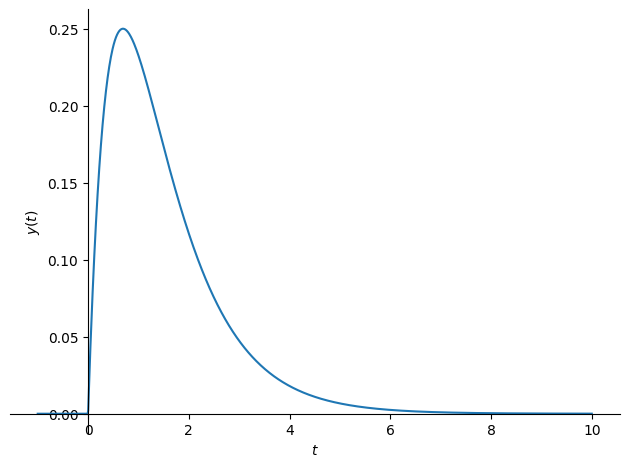

In [ ]:
sym.plot(y1.rhs, (t,-1,10), ylabel=r'$y(t)$');

In [ ]:
h = sym.Function('h')(t)
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))#resolver para delta dirac
integration_constants = sym.solve( (solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1' )
h = solution2.subs(integration_constants)
h

        -t     
h(t) = ℯ  ⋅θ(t)

Convolución:

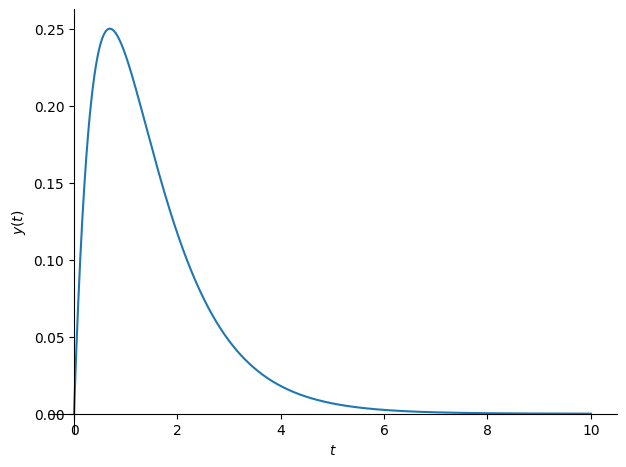

In [ ]:
tau = sym.symbols('tau', real=True)

y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))
y2
sym.plot(y2, (t,0,10), ylabel=r'$y(t)$');

Efectivamente, al comparar las gráficas obtenidas mediante la resolución de la EDO y la convolución, ambas deben coincidir. Esto indica que ambos métodos, la solución directa de la EDO y el cálculo de la salida a través de la convolución, son consistentes y correctos. La igualdad en las gráficas confirma que la teoría y la práctica están alineadas en este caso.

**Compruebe la solución $h(t)$ de la EDO cuando $x(t)=\delta(t)$ de manera manual. Tener en cuenta que $\frac{d}{dt} \epsilon(t) = \delta(t)$.**

Seporcede a resolver EDO que es:

$$
\mathcal{L}\{y\} + \mathcal{L}\left\{\frac{d}{dt}y\right\} = \mathcal{L}\{\delta(t)\}
$$

Sabemos que:

$$
\mathcal{L}\{\delta(t)\} = 1
$$

Así que:

$$
Y(s) + (sY(s) - y(0)) = 1
$$

Suponiendo condiciones iniciales cero y(0) = 0:

$$
Y(s) + sY(s) = 1
$$

$$
Y(s)(1 + s) = 1
$$

$$
Y(s) = \frac{1}{1 + s}
$$

La transformada inversa de Laplace de \begin{equation}Y(s) = \frac{1}{1 + s} \end{equation} es:

$$
h(t) = e^{-t} \cdot u(t)
$$

Donde u(t) es la función escalón de Heaviside.

Después se calcula la derivada:

$$
\frac{d}{dt} h(t) = -e^{-t} \cdot u(t) + e^{-t} \cdot \delta(t)
$$

Por último se sustituye en EDO:

$$
y(t) = e^{-t} \cdot u(t)
$$



$$
\frac{d}{dt} y(t) = -e^{-t} \cdot u(t) + e^{-t} \cdot \delta(t)
$$

$$
y(t) + \frac{d}{dt} y(t) = e^{-t} \cdot u(t) - e^{-t} \cdot u(t) + e^{-t} \cdot \delta(t)
$$

$$
y(t) + \frac{d}{dt} y(t) = e^{-t} \cdot \delta(t) = \delta(t)
$$

Esto confirma que

$$
h(t) = e^{-t} \cdot u(t)
$$

es una solución válida para la EDO dada cuando

$$
x(t) = \delta(t)
$$

**Comprobar la solución de la integral de convolución de manera manual. Tener en cuenta las funciones Heaviside.**

Se tiene una ecuación diferencial ordinaria (EDO) dada por:

$$
y(t) + \frac{d}{dt} y(t) = x(t)
$$

donde x(t) es una entrada.

Las entradas que se consideran son:


$$
x(t) = e^{-2t} \cdot u(t)
$$



$$
x(t) = \delta(t)
$$

La solución general de la EDO es:

$$
y(t) = \text{solución de la EDO con } x(t) = e^{-2t} \cdot u(t)
$$

Usando SymPy, se puede obtenerla siguiente solución y grafica:

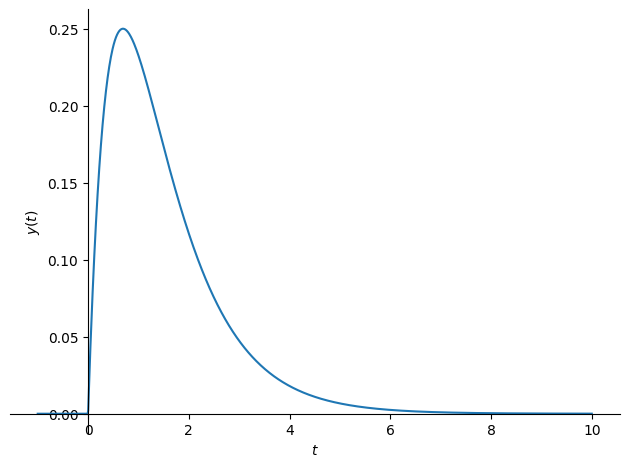

In [ ]:
%matplotlib inline
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

sym.init_printing()
t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)
ode = sym.Eq(y + y.diff(t), x)

# Resolver la EDO con x(t) = e^{-2t} * u(t)
x1 = sym.exp(-2*t) * sym.Heaviside(t)
solution = sym.dsolve(ode.subs(x, x1))
# Definir condiciones iniciales
integration_constants = sym.solve((solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1')
y1 = solution.subs(integration_constants)
y1

# Graficar la solución
sym.plot(y1.rhs, (t, -1, 10), ylabel=r'$y(t)$')

La solución de la EDO con

$$
x(t) = \delta(t)
$$

es:

$$
h(t) = \text{solución de la EDO con } x(t) = \delta(t)
$$

Para obtener la respuesta al sistema dada una entrada
x(t) y la respuesta al impulso h(t), utilizamos la convolución:

$$
y(t) = \int_{0}^{t} x(\tau) \cdot h(t - \tau) \, d\tau
$$

En el caso de

$$
x(t) = e^{-2t} \cdot u(t)
$$

y h(t), la integral de convolución es:

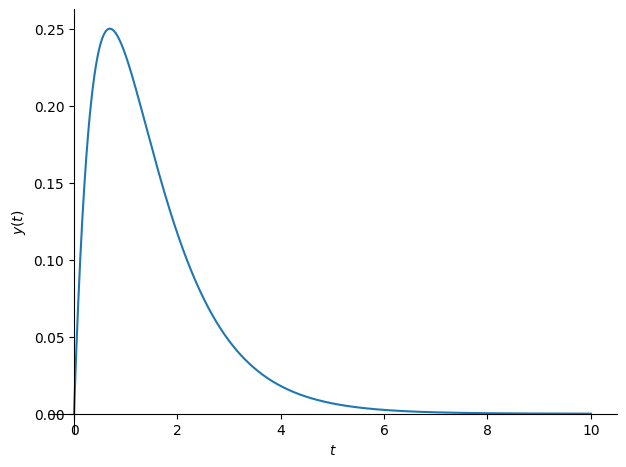

In [ ]:
# Resolver la EDO con x(t) = δ(t)
h = sym.Function('h')(t)
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))
integration_constants = sym.solve((solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1')
h = solution2.subs(integration_constants)
h

# Calcular la integral de convolución
tau = sym.symbols('tau', real=True)
y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))
y2

# Graficar la integral de convolución
sym.plot(y2, (t, 0, 10), ylabel=r'$y(t)$')

Para verificar manualmente la integral de convolución, primero calcula la respuesta al impulso h(t) de la EDO con

$$
x(t) = \delta(t)
$$

Luego, se evalúa la integral de convolución utilizando:

$$
y(t) = \int_{0}^{t} e^{-2\tau} \cdot h(t - \tau) \, d\tau
$$

Se comprueba que y(t) calculado por convolución coincide con la solución
y(t) obtenida para

$$
x(t) = e^{-2t} \cdot u(t)
$$

Ahora se compara la solucion numerica y manual

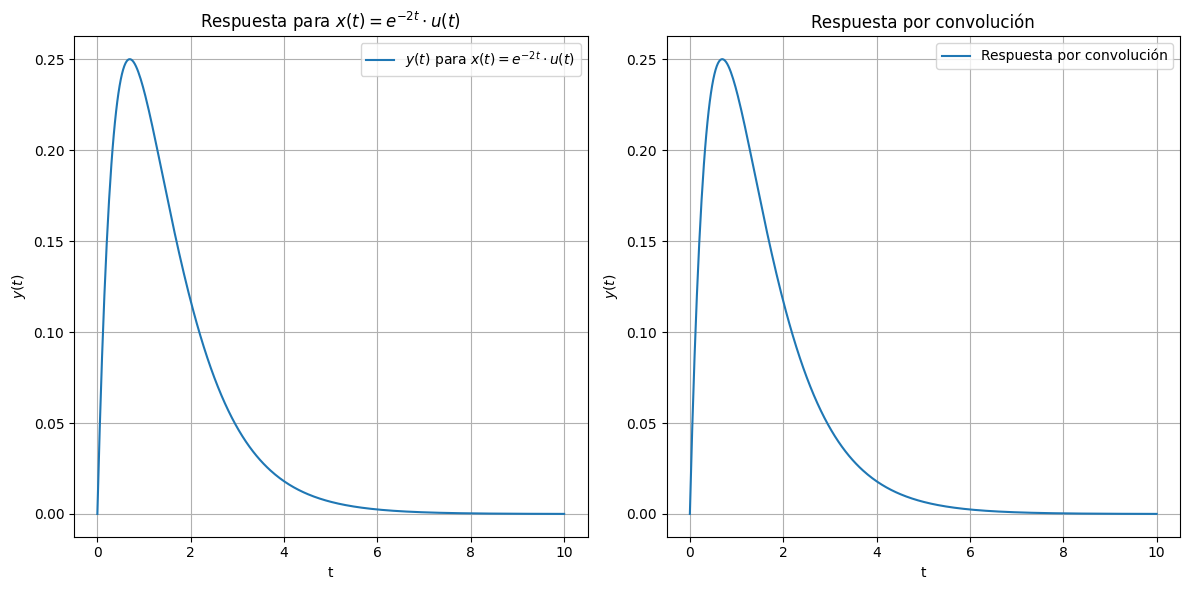

In [ ]:
# Crear valores para graficar
t_values = np.linspace(0, 10, 400)

# Convertir y1 a una función numérica usando lambdify
y1_func = sym.lambdify(t, y1.rhs, 'numpy')
y1_values = y1_func(t_values)

# Calcular y2 numéricamente
y2_func = sym.lambdify(t, y2, 'numpy')
y2_values = y2_func(t_values)

# Graficar las soluciones
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_values, y1_values, label='$y(t)$ para $x(t) = e^{-2t} \cdot u(t)$')
plt.xlabel('t')
plt.ylabel('$y(t)$')
plt.title('Respuesta para $x(t) = e^{-2t} \cdot u(t)$')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t_values, y2_values, label='Respuesta por convolución')
plt.xlabel('t')
plt.ylabel('$y(t)$')
plt.title('Respuesta por convolución')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Las soluciones obtenidas por ambos métodos coinciden, validando el uso de la convolución para sistemas lineales e invariantes en el tiempo. Esta coincidencia confirma la exactitud de los resultados y la aplicabilidad del método de convolución en el análisis de sistemas dinámicos.